# Importing Libraries:


In [1]:
!pip install numpy
import numpy as np # linear algebra
!pip install pandas
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install matplotlib
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
!pip install plotly
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
!pip install wordcloud
from wordcloud import WordCloud,ImageColorGenerator
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
!pip install pywaffle
from pywaffle import Waffle
import warnings
warnings.filterwarnings("ignore")

# Reading the Data:



In [2]:
df= pd.read_csv("C:/Users/Joel John Joseph/Desktop/New folder/country_vaccinations.csv/country_vaccinations.csv")
df

country iso_code        date  total_vaccinations  \
0      Afghanistan      AFG  2021-02-22                 0.0   
1      Afghanistan      AFG  2021-02-23                 NaN   
2      Afghanistan      AFG  2021-02-24                 NaN   
3      Afghanistan      AFG  2021-02-25                 NaN   
4      Afghanistan      AFG  2021-02-26                 NaN   
...            ...      ...         ...                 ...   
53590     Zimbabwe      ZWE  2021-10-22           5814790.0   
53591     Zimbabwe      ZWE  2021-10-23           5826876.0   
53592     Zimbabwe      ZWE  2021-10-24           5836363.0   
53593     Zimbabwe      ZWE  2021-10-25           5848934.0   
53594     Zimbabwe      ZWE  2021-10-26           5866629.0   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0                    0.0                      NaN                     NaN   
1                    NaN                      NaN                     NaN   
2                    NaN                      NaN                     NaN   
3                    NaN                      NaN                     NaN   
4                    NaN                      NaN                     NaN   
...                  ...                      ...                     ...   
53590          3271638.0                2543152.0                 17507.0   
53591          3276746.0                2550130.0                 12086.0   
53592          3281618.0                2554745.0                  9487.0   
53593          3287996.0                2560938.0                 12571.0   
53594          3294687.0                2571942.0                 17695.0   

       daily_vaccinations  total_vaccinations_per_hundred  \
0                     NaN                            0.00   
1                  1367.0                             NaN   
2                  1367.0                             NaN   
3                  1367.0                             NaN   
4                  1367.0                             NaN   
...                   ...                             ...   
53590             20007.0                           38.53   
53591             19845.0                           38.61   
53592             19241.0                           38.67   
53593             15135.0                           38.75   
53594             15697.0                           38.87   

       people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                               0.00                                  NaN   
1                                NaN                                  NaN   
2                                NaN                                  NaN   
3                                NaN                                  NaN   
4                                NaN                                  NaN   
...                              ...                                  ...   
53590                          21.68                                16.85   
53591                          21.71                                16.90   
53592                          21.74                                16.93   
53593                          21.79                                16.97   
53594                          21.83                                17.04   

       daily_vaccinations_per_million  \
0                                 NaN   
1                                34.0   
2                                34.0   
3                                34.0   
4                                34.0   
...                               ...   
53590                          1326.0   
53591                          1315.0   
53592                          1275.0   
53593                          1003.0   
53594                          1040.0   

                                                vaccines  \
0      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  

In [3]:
new_df = df.groupby(["country",'iso_code','vaccines'])['total_vaccinations',
                     'people_vaccinated','people_fully_vaccinated',
                    'daily_vaccinations','total_vaccinations_per_hundred',
                    'people_vaccinated_per_hundred',"people_fully_vaccinated_per_hundred"
,'daily_vaccinations_per_million'].max().reset_index()

# What is the proportion of Top 10 Vaccine in the race of fighting Covid19?


In [4]:
top10 = new_df['vaccines'].value_counts().nlargest(10)
top10

Oxford/AstraZeneca                                                   27
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech        24
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                         15
Oxford/AstraZeneca, Pfizer/BioNTech                                  11
Oxford/AstraZeneca, Sinopharm/Beijing                                10
Pfizer/BioNTech                                                       9
Moderna, Pfizer/BioNTech                                              8
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V     7
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing                6
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac       4
Name: vaccines, dtype: int64

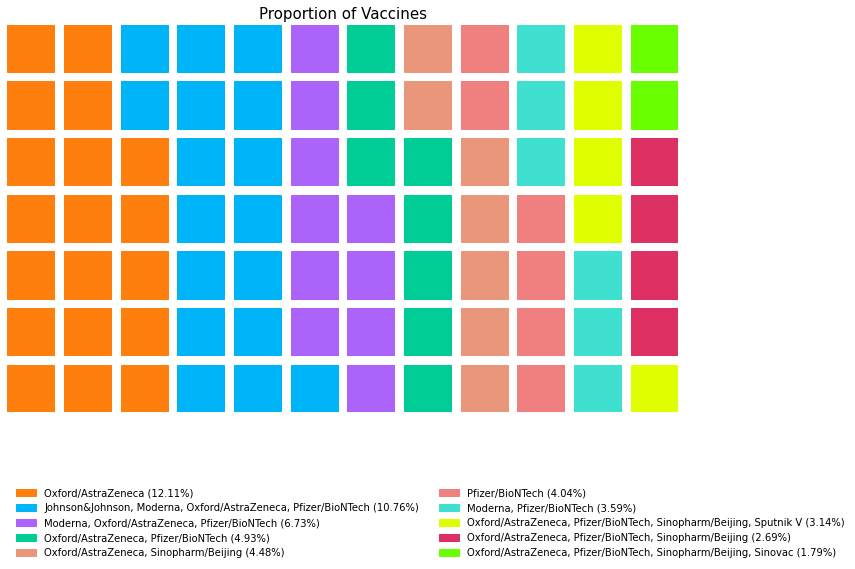

In [5]:
data = dict(new_df['vaccines'].value_counts(normalize = True).nlargest(10)*100)                                  #dict(new_df['vaccines'].value_counts(normalize = True) * 100)
vaccine = ['Oxford/AstraZeneca', 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Pfizer/BioNTech', 'Sputnik V', 'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Sinopharm/Beijing', 'Moderna, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac'] 
fig = plt.figure( 
    rows=7,
    columns=12,
    FigureClass = Waffle, 
    values = data, 
    title={'label': 'Proportion of Vaccines', 'loc': 'center',
          'fontsize':15},
    colors=("#FF7F0E", "#00B5F7", "#AB63FA","#00CC96","#E9967A","#F08080","#40E0D0","#DFFF00","#DE3163","#6AFF00"),
    labels=[f"{k} ({v:.2f}%)" for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': 2, 'framealpha': 0},
    figsize=(12, 9)
)
fig.show()



# Observation:
In a range of percentage of vaccines 28.44% used Oxford/AstraZeneca
Oxford/AstraZeneca is the most used Vaccine
Later Pfizer/BioNTech was the most used Vaccine and now it’s in 5th place also Oxford/AstraZeneca was not in the top 3 & now it’s in 1st place. Looks like Oxford/AstraZeneca works best among the vaccines

# What is the number of total vaccinations & daily vaccinations according to countries?

In [6]:
data = new_df[['country','total_vaccinations']].nlargest(25,'total_vaccinations')
fig = px.bar(data, x = 'country',y = 'total_vaccinations',title="Number of total vaccinations according to countries",)
fig.show()

In [7]:
data = new_df[['country','daily_vaccinations']].nlargest(25,'daily_vaccinations')
fig = px.bar(data, x = 'country',y = 'daily_vaccinations',title="Number of daily vaccinations according to countries",)
fig.show()

# Which vaccine is used by which Country?

In [8]:
vacc = new_df["vaccines"].unique()
for i in vacc:
    c = list(new_df[new_df["vaccines"] == i]['country'])
    print(f"Vaccine: {i}nUsed countries: {c}")

Vaccine: Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/BeijingnUsed countries: ['Afghanistan', 'Cameroon']
Vaccine: Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik VnUsed countries: ['Albania', 'Azerbaijan', 'Bosnia and Herzegovina', 'Oman']
Vaccine: Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik VnUsed countries: ['Algeria', 'Armenia', 'Zimbabwe']
Vaccine: Oxford/AstraZeneca, Pfizer/BioNTechnUsed countries: ['Andorra', 'Bermuda', 'Cayman Islands', 'Costa Rica', 'Grenada', 'Kosovo', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saudi Arabia', 'Slovenia']
Vaccine: Oxford/AstraZenecanUsed countries: ['Angola', 'Anguilla', 'Democratic Republic of Congo', 'Ethiopia', 'Falkland Islands', 'Fiji', 'Kiribati', 'Lesotho', 'Liberia', 'Madagascar', 'Mali', 'Montserrat', 'Nauru', 'Nigeria', 'Niue', 'Papua New Guinea', 'Pitcairn', 'Saint Helena', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Solomon Islands', 'Togo', 'Tonga', 'Tuvalu', 

In [9]:
fig = px.choropleth(new_df,locations = 'country',locationmode = 'country names',color = 'vaccines',
                   title = 'Vaccines used by specefic Country',hover_data= ['total_vaccinations'])
fig.show()

# Which Vaccine is Used the most?

In [10]:
vaccine = new_df["vaccines"].value_counts().reset_index()
vaccine.columns = ['Vaccines','Number of Country']
vaccine.nlargest(5,"Number of Country")

Vaccines  Number of Country
0                                 Oxford/AstraZeneca                 27
1  Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...                 24
2       Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                 15
3                Oxford/AstraZeneca, Pfizer/BioNTech                 11
4              Oxford/AstraZeneca, Sinopharm/Beijing                 10

# Country Wise Daily Vaccination 
To check what is the vaccination trend in each country, check the below code. We are drawing the line plot where the x-axis is the date and the y-axis is the count of daily vaccination, Colours Is set to be the country. 

In [11]:
fig = px.line(df, x = 'date', y ='daily_vaccinations', color = 'country')
fig.update_layout(
    title={
            'text' : "Daily vaccination trend",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily Vaccinations"
)
fig.show()

# Observation:

There is a mixed kind of trend among each country. Sometimes a particular country shows a positive trend and sometimes it shows a negative trend.

# Total Vaccinations per country grouped by Vaccines:

In [12]:
fig = px.treemap(new_df,names = 'country',values = 'total_vaccinations',
                 path = ['vaccines','country'],
                 title="Total Vaccinations per country grouped by Vaccines",
                 color_discrete_sequence =px.colors.qualitative.Set1)
fig.show()

# Daily Vaccinations per Countries:

In [13]:
fig = go.Choropleth(locations = new_df["country"],locationmode = 'country names',
                    z = new_df['total_vaccinations'],
                    text= new_df['country'],colorbar = dict(title= "Total Vaccinations"))
data = [fig]
layout = go.Layout(title = 'Total Vaccinations per Country')
fig = dict(data = data,layout = layout)
iplot(fig)

# Relation between Total Vaccinations and Total Vaccinations per Hundred:

In [14]:
fig = go.Choropleth(locations = new_df["country"],locationmode = 'country names',
                    z = new_df['daily_vaccinations'],
                    text= new_df['country'],colorbar = dict(title= "Daily Vaccinations"))
data = [fig]
layout = go.Layout(title = 'Daily Vaccinations per Countries')
fig = dict(data = data,layout = layout)
iplot(fig)

In [15]:
fig = px.scatter(new_df,x = 'total_vaccinations',y='total_vaccinations_per_hundred',
                 size='total_vaccinations',
                 hover_name = 'country',size_max = 50,
                 title="Total vs Total vaccinations per hundred grouped by Vaccines",
                color_discrete_sequence = px.colors.qualitative.Bold)
fig.show()

# The People vaccinated vs people fully vaccinated per hundred in the world 

In [16]:
def plot_till_date(value1, value2, title, color1, color2) : 
    so_far_dict = {}
    for dates in df.date.unique() : 
        so_far_dict[dates], value1_count, value2_count = [], 0, 0
        for i in range(len(df)) : 
            if df.date[i] == dates : 
                value1_count += df[value1][i]
                value2_count += df[value2][i]
#         if dates not in so_far_dict.keys() : 
        so_far_dict[dates].append(value1_count) 
        so_far_dict[dates].append(value2_count)
    so_far_df = pd.DataFrame.from_dict(so_far_dict, orient = 'index', columns=[value1, value2])
    so_far_df.reset_index(inplace = True)
#     return so_far_df
    so_far_df.sort_values(by='index', inplace = True)
    plot = go.Figure(data=[go.Scatter( 
            x = so_far_df['index'], 
            y = so_far_df[value1], 
            stackgroup='one', 
            name = value1, 
            marker_color= color1), 
                           go.Scatter( 
            x = so_far_df['index'], 
            y = so_far_df[value2], 
            stackgroup='one',
            name = value2, 
            marker_color= color2) 
        ]) 
    plot.update_layout(
    title={
            'text' : title,
            'y':0.95,
            'x':0.5
        },
        xaxis_title="Date"
    )
    return plot.show()

In [17]:
plot_till_date('people_fully_vaccinated_per_hundred', 'people_vaccinated_per_hundred', 'People vaccinated vs Fully vaccinated per hundred till date', '#0938e3','#7127cc')

# Observation

People fully vaccinated in the world per hundred is around 2
People that are vaccinated in the world is around 7


# Daily vaccination trend per million  

In [18]:
fig = px.line(df, x = 'date', y ='daily_vaccinations_per_million', color = 'country')
fig.update_layout(
    title={
            'text' : "Daily vaccination trend per million",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily Vaccinations per million"
)
fig.show()

# Most Used Vaccine 

In [19]:
df.vaccines.unique()

array(['Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech', 'Oxford/AstraZeneca',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V',
       'CanSino, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Pfizer/BioNTech', 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing',
       'Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Sinovac',
       'Johnson&

# Word art of Vaccines 

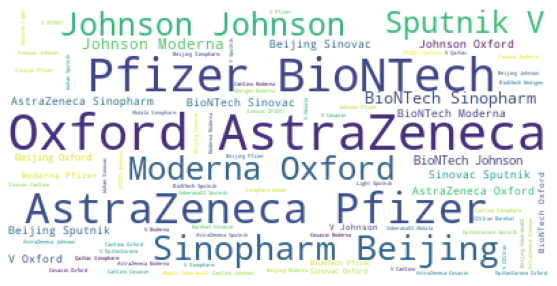

In [20]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(df.vaccines))
plt.figure(figsize=(12,5))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

In [21]:
!pip install ggplot
def plot_trend(dataframe,feature,title,country):
    plt.style.use('ggplot')
    plt.figure(figsize=(20,25))
    
    for i,country in enumerate(country):
        plt.subplot(8,4,i+1)
        data = dataframe[dataframe['country'] == country]
        sns.lineplot(x=data['date'] ,y=data[feature],label = feature)
        plt.xlabel('')
        plt.tick_params(axis='x',which='both',top=False,bottom=False,labelbottom=False)
        plt.title(country)
        
    plt.suptitle(title,y=1.05)
    plt.tight_layout()
    plt.show()

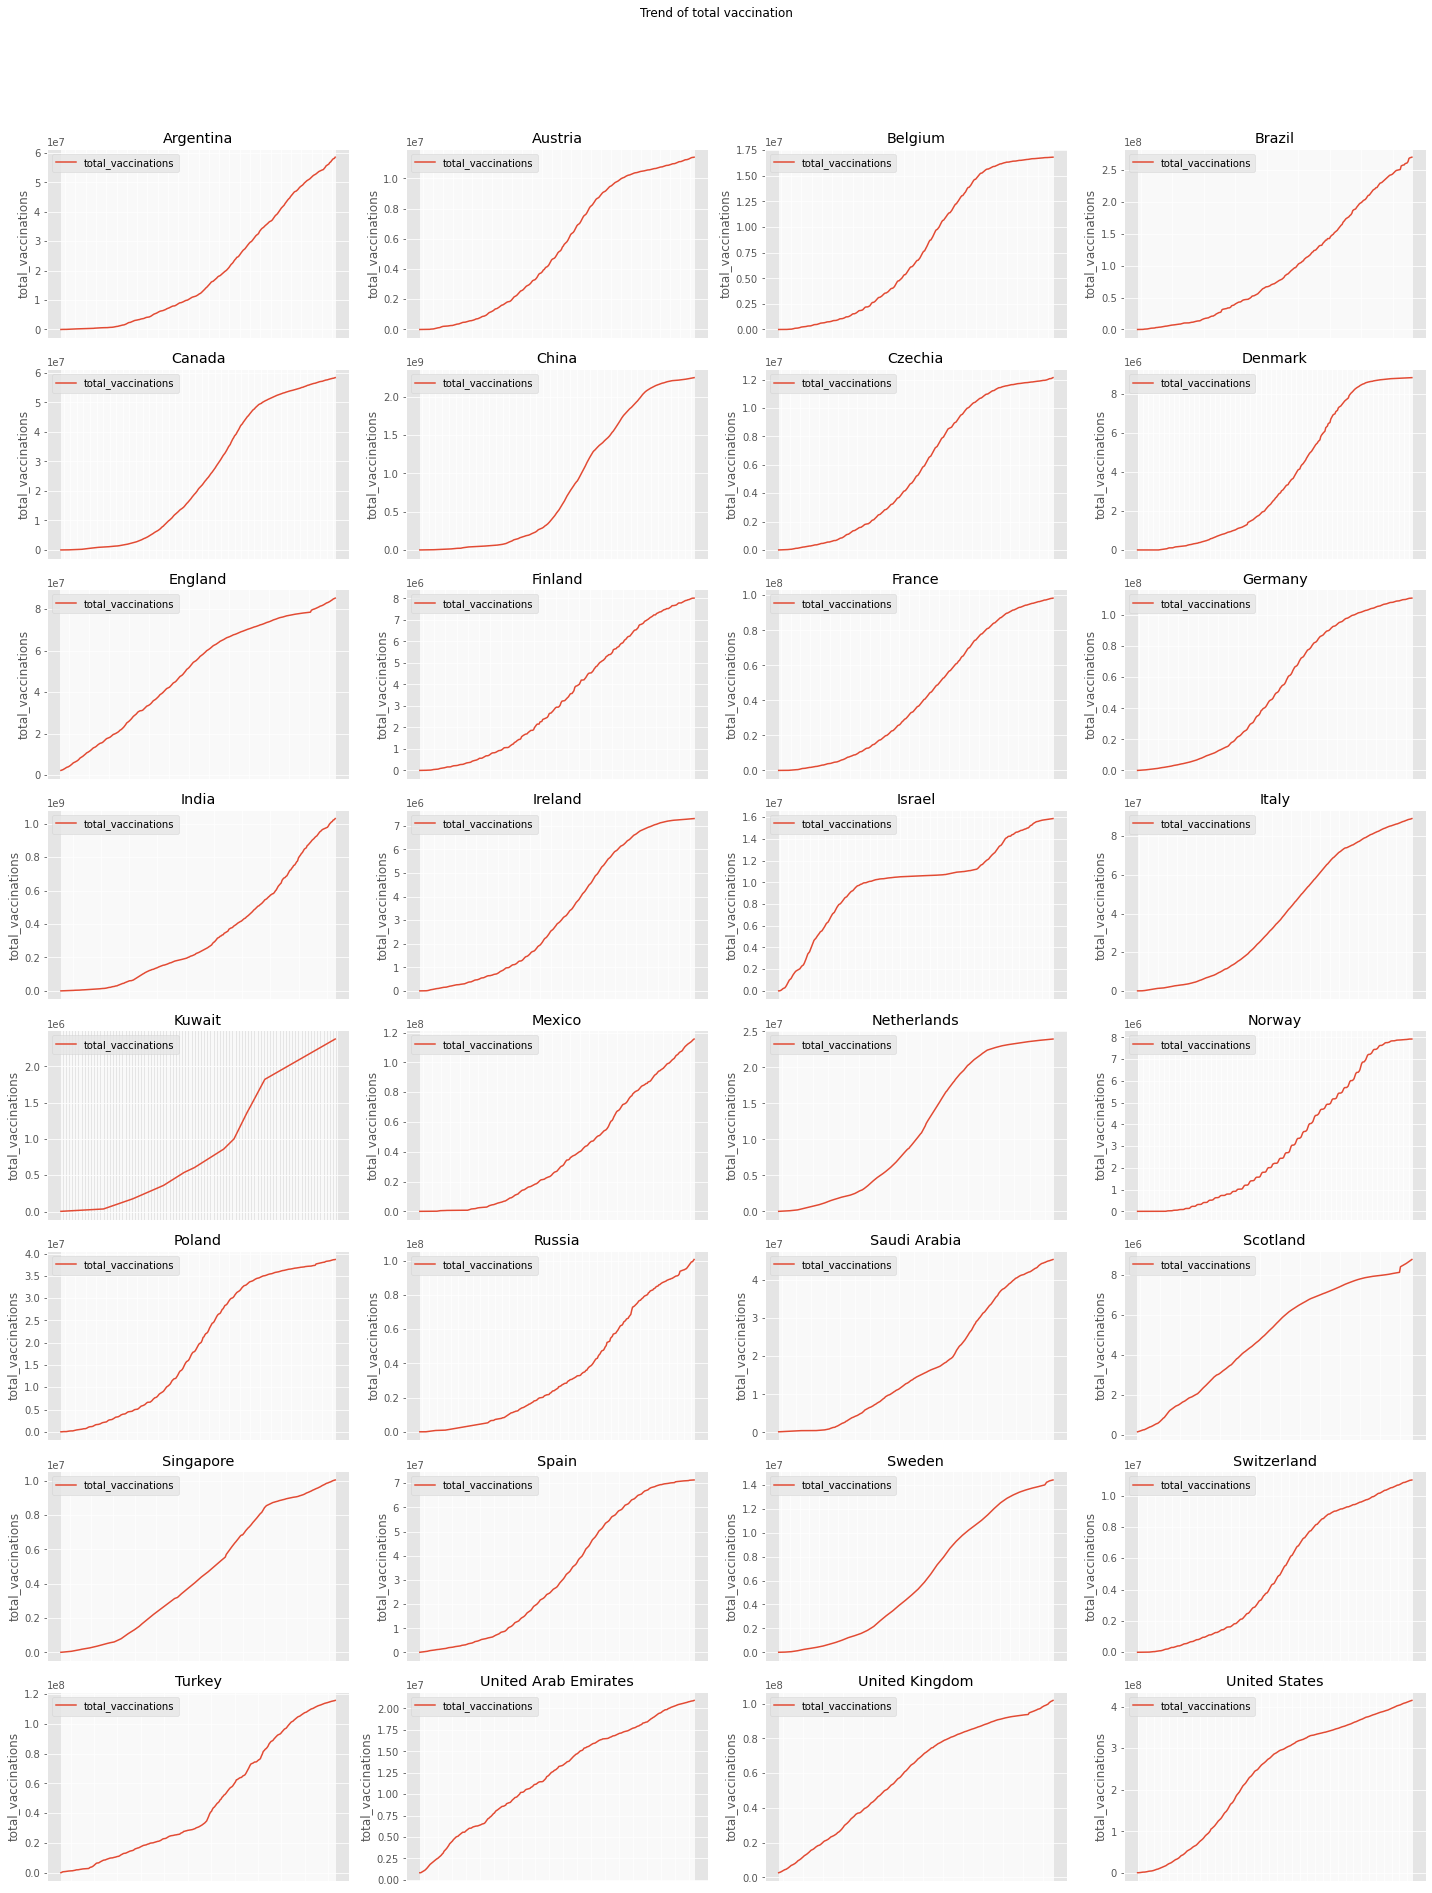

In [22]:
country = ['Argentina', 'Austria', 'Belgium', 'Brazil','Canada','China','Czechia',
           'Denmark', 'England','Finland', 'France','Germany','India','Ireland', 
           'Israel', 'Italy', 'Kuwait','Mexico', 'Netherlands','Norway', 'Poland',
           'Russia','Saudi Arabia', 'Scotland','Singapore','Spain', 'Sweden',
           'Switzerland', 'Turkey','United Arab Emirates', 'United Kingdom', 'United States']
plot_trend(df,'total_vaccinations','Trend of total vaccination',country)

# Word Art of Countries
Word Cloud is a unique way to get information from our dataset. The words are shown in the form of art where the size proportional depends on how much the particular word repeated in the dataset. This is made by using the WordCloud library.

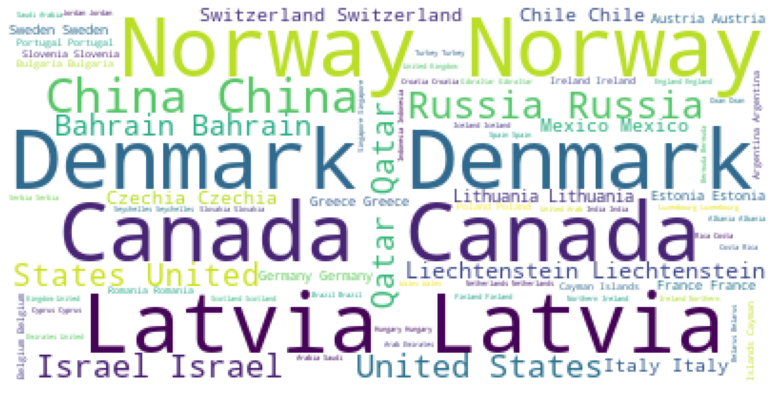

In [23]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(df.country))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

# Total vaccinated – India vs the USA

In [24]:
india_usa = [df[df.country == 'United States'], df[df.country == 'India']]
result = pd.concat(india_usa)
fig = px.line(result, x = 'date', y ='total_vaccinations', color = 'country')
fig.update_layout(
    title={
            'text' : "Total vaccinated - India vs USA",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Total Vaccinations"
)
fig.show()


# Key Observations:
Sputnik V is mostly used In Asia, Africa, and South America
Most of the countries are not fully vaccinated
Modena and Pfizer are mostly used in North America and Europe
Pfizer/BioNTech are mostly used in the world, its around 47.6%
Covishield and Covaxin are in the 10th position
China has started Mass Vaccination first
Daily vaccination is highest in the USA thought the USA has started vaccination late as compared to China